In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import numpy as np
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
%matplotlib inline

Exersice A

In [2]:
data = pd.read_csv('nba2013_data.csv')
data = data.select_dtypes(['number'])
imp_mean = IterativeImputer(random_state=0)
data.replace('?.0','NaN', inplace = True)
imputed_DF = pd.DataFrame(imp_mean.fit_transform(data))
imputed_DF.columns = data.columns
imputed_DF.index = data.index
imputed_DF.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.266667,...,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0,2013.0
1,20.0,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,0.0,0.098607,...,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0,2013.0
2,27.0,53.0,12.0,961.0,143.0,275.0,0.520,0.0,0.0,0.153420,...,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0,2013.0
3,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.426667,...,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330.0,2013.0
4,25.0,56.0,30.0,951.0,136.0,249.0,0.546,0.0,1.0,0.000000,...,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328.0,2013.0


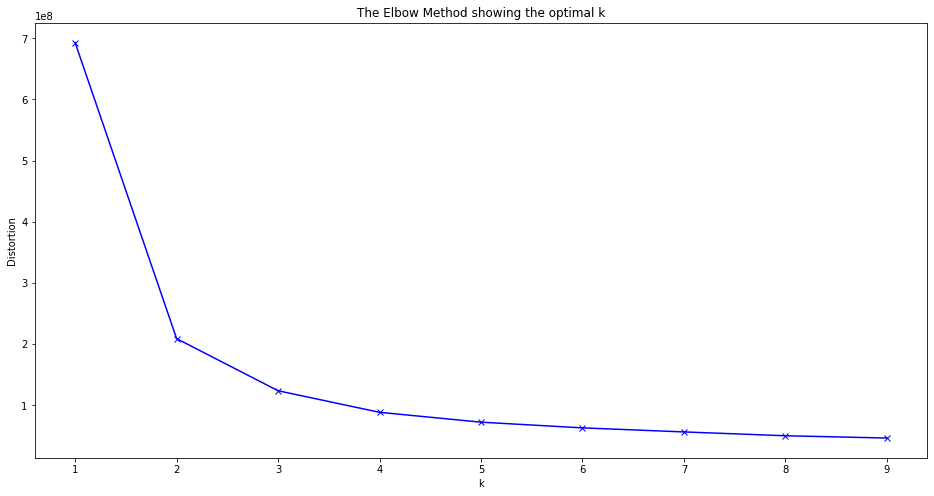

In [3]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(imputed_DF)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

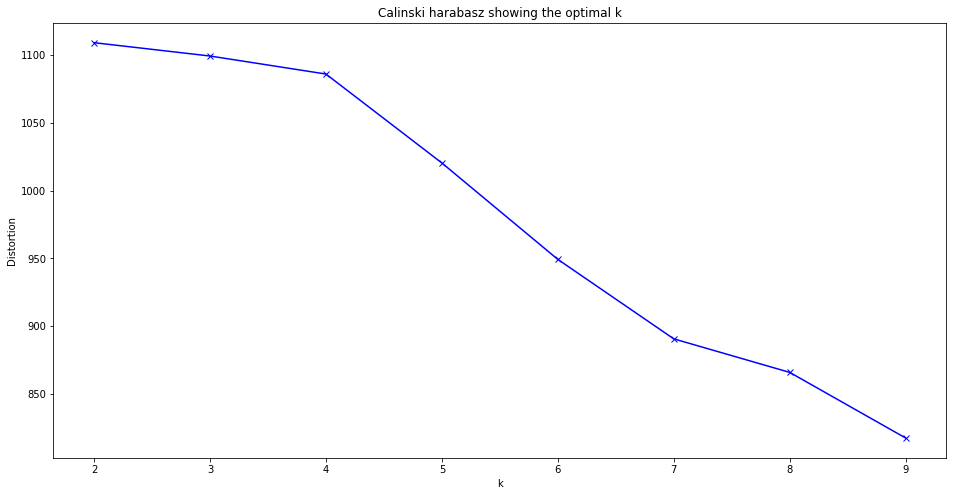

In [23]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(imputed_DF)
    #print(np.unique(kmeanModel.labels_))
    labels = kmeanModel.labels_
    distortions.append(metrics.calinski_harabasz_score(imputed_DF, labels))
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Calinski harabasz showing the optimal k')
plt.show()

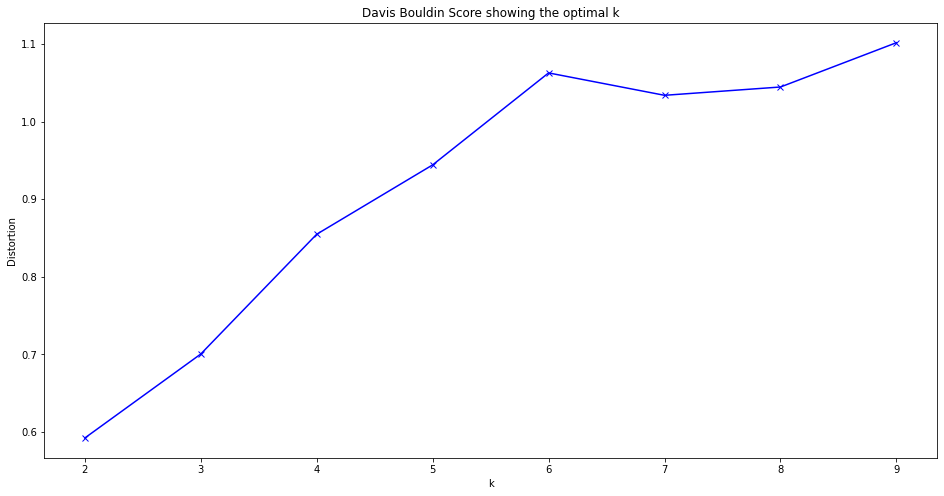

In [25]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(imputed_DF)
    #print(np.unique(kmeanModel.labels_))
    labels = kmeanModel.labels_
    distortions.append(metrics.davies_bouldin_score(imputed_DF, labels))
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Davis Bouldin Score showing the optimal k')
plt.show()

Exersice B

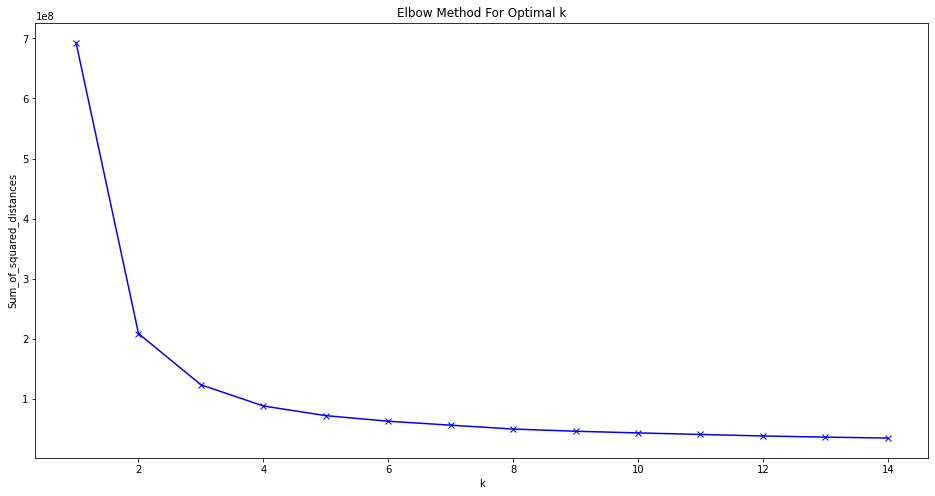

In [27]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    df = KMeans(n_clusters=k)
    df = df.fit(imputed_DF)
    Sum_of_squared_distances.append(df.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Sum of squared Method For Optimal k')
plt.show()